<a href="https://www.kaggle.com/code/taf1404/crime-rate?scriptVersionId=115500676" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Downloading libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pandas_profiling import ProfileReport
import plotly.express as px
%matplotlib inline

## Introduction
* After some research i thought that crime rates in america states are correlated with unemployment rating and alcohol consumption.

## Preparing data

In [2]:
df_crime = pd.read_csv('/kaggle/input/crime-rates/report.csv')
df_alcohol = pd.read_csv('/kaggle/input/alcohol-consumption-us/Alcohol_Consumption_US.csv')
df_un_rate = pd.read_csv('/kaggle/input/unemployment-by-county-us/output.csv')

In [3]:
#https://www.kaggle.com/code/pratik1120/youth-unemployment-rates
#https://www.kaggle.com/datasets/jayrav13/unemployment-by-county-us
#https://www.kaggle.com/datasets/valbauman/student-engagement-online-learning-supplement?select=education.csv
#https://www.kaggle.com/search?q=education+level
#https://www.kaggle.com/code/karats/suicide-rate-data-analysis-data-vis-basics

## Crime Rate
* Is crime in America rising or falling? The answer is not as simple as politicians make it out to be because of how the FBI collects crime data from the country’s more than 18,000 police agencies. National estimates can be inconsistent and out of date, as the FBI takes months or years to piece together reports from those agencies that choose to participate in the voluntary program. To try to fill this gap, The Marshall Project collected and analyzed more than 40 years of data on the four major crimes the FBI classifies as violent — homicide, rape, robbery and assault — in 68 police jurisdictions with populations of 250,000 or greater. We obtained 2015 reports, which have yet to be released by the FBI, directly from 61 of them. We calculated the rate of crime in each category and for all violent crime, per 100,000 residents in the jurisdiction, based on the FBI’s estimated population for that year. We used the 2014 estimated population to calculate 2015 crime rates per capita.

### Presidency
* Since the presidents control country differently, i thought we should add presidents and their parties column. in order to know under whos presidency crimes rate was high

In [4]:
presidents = []
parties = []
for i in range(df_crime.shape[0]):
    try:
        year = df_crime.report_year[i]
        if year <= 1977:
            presidents.append('Rudolph')
            parties.append('Republican')
        elif year<= 1981:
            presidents.append('Earl')
            parties.append('Democrat')
        elif year<= 1989:
            presidents.append('Regan')
            parties.append('Republican')
        elif year <= 1993:
            presidents.append('Bush')
            parties.append('Republican')
        elif year <= 2001:
            presidents.append('Jefferson')
            parties.append('Democrat')
        elif year <= 2010:
            presidents.append('Bush')
            parties.append('Republican')
        else:
            presidents.append('Obama')
            parties.append('Democrat')
    except KeyError:
        presidents.append('0')
        parties.append('0')

In [5]:
# 2010 - 2015 Barack H. Obama Democrat

# 2001 - 2010 George W. Bush Republican

# 1993 - 2001 William Jefferson Clinton Democrat

# 1989 - 1993 George Herbet Walker Bush Republican

# 1981 - 1989 Ronald Wilson Reagan Republican

# 1977 - 1981 James (Jimmy) Earl Carter Democrat

# 1974 - 1977 Gerald Rudolph Ford Republican

df_crime['president'] = presidents
df_crime['party'] = parties

In [6]:
df_crime.shape

(2829, 17)

In [7]:
df_crime.head()

,report_year,agency_code,agency_jurisdiction,population,violent_crimes,homicides,rapes,assaults,robberies,months_reported,crimes_percapita,homicides_percapita,rapes_percapita,assaults_percapita,robberies_percapita,president,party
0,1975,NM00101,"Albuquerque, NM",286238.0,2383.0,30.0,181.0,1353.0,819.0,12.0,832.52,10.48,63.23,472.68,286.13,Rudolph,Republican
1,1975,TX22001,"Arlington, TX",112478.0,278.0,5.0,28.0,132.0,113.0,12.0,247.16,4.45,24.89,117.36,100.46,Rudolph,Republican
2,1975,GAAPD00,"Atlanta, GA",490584.0,8033.0,185.0,443.0,3518.0,3887.0,12.0,1637.44,37.71,90.30,717.10,792.32,Rudolph,Republican
3,1975,CO00101,"Aurora, CO",116656.0,611.0,7.0,44.0,389.0,171.0,12.0,523.76,6.00,37.72,333.46,146.58,Rudolph,Republican
4,1975,TX22701,"Austin, TX",300400.0,1215.0,33.0,190.0,463.0,529.0,12.0,404.46,10.99,63.25,154.13,176.10,Rudolph,Republican


### we need to split agency jurisdiction into city and state for more convinience 

In [8]:
cities = []
state_codes = []
for i in range(df_crime.shape[0]): 
    t = df_crime.agency_jurisdiction[i].split(',')
    cities.append(t[0])
    try:
        state_codes.append(t[1])
    except IndexError:
        state_codes.append('Unknown')
    i+=1
    
df_crime['city'] = cities
df_crime['state_codes'] = state_codes
df_crime.drop('agency_jurisdiction',axis=1,inplace=True)

In [9]:
df_crime = df_crime[df_crime.state_codes!='Unknown']

In [10]:
df_crime = df_crime.reset_index()

In [11]:
overall_crimes = []
for i in range(df_crime.shape[0]):
    overall_crime = df_crime.violent_crimes[i]+ df_crime.homicides[i]+df_crime.rapes[i]+df_crime.assaults[i]+df_crime.robberies[i]
    overall_crimes.append(overall_crime)
df_crime['all_crime'] = overall_crimes

In [12]:
df_crime

,index,report_year,agency_code,population,violent_crimes,homicides,rapes,assaults,robberies,months_reported,crimes_percapita,homicides_percapita,rapes_percapita,assaults_percapita,robberies_percapita,president,party,city,state_codes,all_crime
0,0,1975,NM00101,286238.0,2383.0,30.0,181.0,1353.0,819.0,12.0,832.52,10.48,63.23,472.68,286.13,Rudolph,Republican,Albuquerque,NM,4766.0
1,1,1975,TX22001,112478.0,278.0,5.0,28.0,132.0,113.0,12.0,247.16,4.45,24.89,117.36,100.46,Rudolph,Republican,Arlington,TX,556.0
2,2,1975,GAAPD00,490584.0,8033.0,185.0,443.0,3518.0,3887.0,12.0,1637.44,37.71,90.30,717.10,792.32,Rudolph,Republican,Atlanta,GA,16066.0
3,3,1975,CO00101,116656.0,611.0,7.0,44.0,389.0,171.0,12.0,523.76,6.00,37.72,333.46,146.58,Rudolph,Republican,Aurora,CO,1222.0
4,4,1975,TX22701,300400.0,1215.0,33.0,190.0,463.0,529.0,12.0,404.46,10.99,63.25,154.13,176.10,Rudolph,Republican,Austin,TX,2430.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2783,2823,2015,AZ01003,529675.0,3472.0,31.0,422.0,1960.0,1059.0,NaN,655.50,5.85,79.67,370.04,199.93,Obama,Democrat,Tucson,AZ,6944.0
2784,2824,2015,OK07205,401520.0,3628.0,55.0,365.0,2354.0,854.0,NaN,903.57,13.70,90.90,586.27,212.69,Obama,Democrat,Tulsa,OK,7256.0
2785,2825,2015,VA12800,452797.0,626.0,19.0,103.0,234.0,270.0,NaN,138.25,4.20,22.75,51.68,59.63,Obama,Democrat,Virginia Beach,VA,1252.0
2786,2826,2015,DCMPD00,672228.0,8084.0,162.0,494.0,4024.0,3404.0,NaN,1202.57,24.10,73.49,598.61,506.38,Obama,Democrat,Washington,DC,16168.0


In [13]:
## Uknown state was yearly report so we dropped it
df_crime = df_crime.drop(df_crime[df_crime.state_codes == 'Unknown'].index)
profile = ProfileReport(df_crime)
profile.to_file("profile_output.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [14]:
columns = ['violent_crimes','homicides', 'rapes', 'assaults', 'robberies','crimes_percapita', 'homicides_percapita', 'rapes_percapita',
       'assaults_percapita', 'robberies_percapita']

In [15]:
data_year = df_crime.groupby(['report_year'])[columns].median()

In [16]:
fig = px.line(data_year)
fig.show()

In [17]:
values = [[100 for i in range(10)]]

for index, row in data_year.iterrows():
    value = []
    row = row.to_dict()
    if index == 1975:
        initial_row = row
    else:
        for key, value_t in row.items():
            value.append(initial_row[key]*100/value_t)
        values.append(value)   

In [18]:
df_per = pd.DataFrame(values, columns=[columns],index=data_year.index)

### Big changes
* we can see that from above linegraph `Assults` are dropped dramatically while `homicides` are rocket up.

<AxesSubplot:xlabel='report_year'>

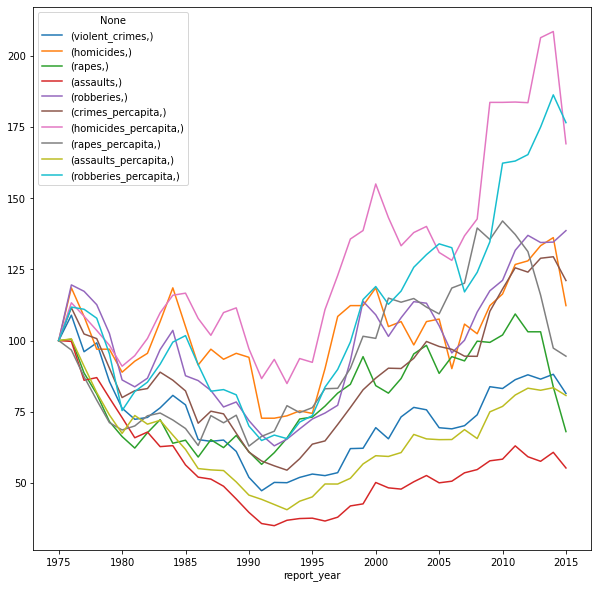

In [19]:
df_per.plot.line(figsize=(10,10))

In [20]:
crime_year_overall = df_crime.groupby(['report_year','president','party'],as_index=False)['all_crime'].sum()

## Presidency
* during `Regan`s presidency crime rate incresead and `Jefferson` somehow managed to decrease it dramatically

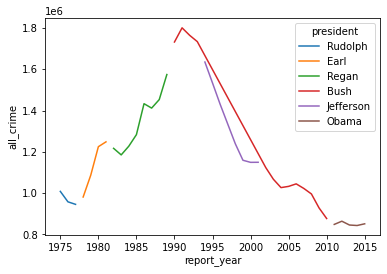

In [21]:
sns.lineplot(x='report_year',y='all_crime',data=crime_year_overall,hue='president')
sns.set(rc = {'figure.figsize':(20,10)})

### US Unemployment Rate

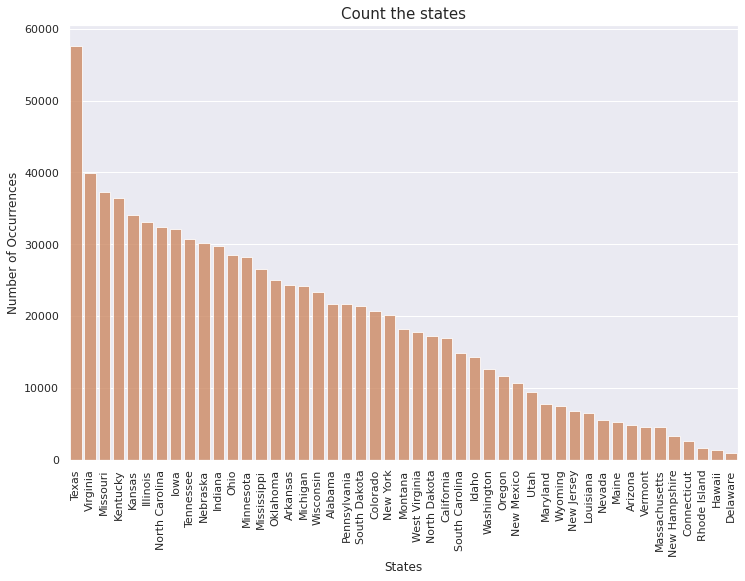

In [22]:
color = sns.color_palette()
cnt_srs = df_un_rate.State.value_counts()

plt.figure(figsize=(12,8))
sns.barplot(x= cnt_srs.index,y= cnt_srs.values, alpha=0.8, color=color[1])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('States', fontsize=12)
plt.title('Count the states', fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

In [23]:
df_un_rate = df_un_rate.groupby(['Year','State'],as_index=False)['Rate'].median()
df_un_rate

,Year,State,Rate
0,1990,Alabama,7.60
1,1990,Arizona,6.60
2,1990,Arkansas,7.30
3,1990,California,7.25
4,1990,Colorado,4.70
...,...,...,...
1253,2016,Virginia,4.30
1254,2016,Washington,6.70
1255,2016,West Virginia,6.70
1256,2016,Wisconsin,4.30


In [24]:
df_un_by_year = df_un_rate.groupby(['Year','State'],as_index=False)['Rate'].median()

In [25]:
# plt.figure(figsize=(60,20))
#sns.lineplot(data=df_un_by_year, x=df_un_by_year.Year, y=df_un_by_year.Rate,hue=df_un_by_year.State,legend=None)
fig = px.line(df_un_by_year, x=df_un_by_year.Year, y=df_un_by_year.Rate, color=df_un_by_year.State)
fig.show()

In [26]:

fig = px.sunburst(df_un_by_year, path=['State', 'Year'], values='Rate')
fig.show()

In [27]:
data_unemployment = df_un_rate.groupby(['Year'])['Rate'].median()
px.line(data_unemployment)

### Alcohol Consumption Rate

In [28]:
df_alcohol = df_alcohol.rename(
    columns={"Beer (Per capita consumption)": "Beer",
             "Wine (Per capita consumption)": "Wine",
            "Spirits (Per capita consumption)": "Spirits",
             "All beverages (Per capita consumption)": "Overall"})

In [29]:
px.line(df_alcohol,x=df_alcohol.Year,y=df_alcohol.Overall
        ,color=df_alcohol.State)

In [30]:
data_alcohol = df_alcohol.groupby(['Year'])['Overall'].sum()
px.line(data_alcohol)